# Diabetes Patients Prediction
### Project Overview:

This project focuses on predictive analysis for diabetes diagnosis using a dataset originally sourced from the National Institute of Diabetes and Digestive and Kidney Diseases. The dataset contains various medical and demographic variables for a group of Pima Indian heritage females who are at least 21 years old.

The primary objective of this project is to develop a predictive model that can diagnostically predict whether a patient has diabetes based on the provided diagnostic measurements and demographic information.

## Features names: 

| Features|                         Values |
| ---------|                       ---------- |
| Pregnancies|                     The number of pregnancies a patient has had.|
|Glucose|                          Plasma glucose concentration, an indicator of blood sugar levels.|
|BloodPressure|                    Diastolic blood pressure.|
|SkinThickness|                    Skinfold thickness, which may be related to body composition.
|Insulin|                          2-Hour serum insulin level.|
|BMI|                              A measure of body weight and height, indicating body fat.|
|DiabetesPedigreeFunction|         A measure of the diabetes heredity risk based on family history.|
|Age|                              The age of the patient in years.|
|Outcome|                          The target variable indicating whether the patient has diabetes (1 for positive, 0 for negative).|

In [1]:

# Warning is used to supress the display of warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score #cross validation score

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

### Checking For Outliers

In [8]:
feature_names=list(df.columns)[:8]


In [9]:
import plotly.graph_objs as go

# Create a list to store the box plot traces
box = []

# Iterate through each column and create a box plot
for column in feature_names:
    # Exclude the target variable
    trace = go.Box(y=df[column], name=column)
    box.append(trace)

# Create a layout
layout = go.Layout(title='Box Plots for  Diabetes Dataset Columns')

# Create a figure and add the traces and layout
fig = go.Figure(data=box, layout=layout)

# Show the figure
fig.show()

## From the above box plot outliers has been identified 

### Handling Missing Values:

In [10]:
for columns in feature_names:
    Q1=df[columns].quantile(0.25)
    Q3 =df[columns].quantile(0.75)
    IQR=Q3-Q1
    upper_limit=Q3+1.5*IQR
    lower_limit=Q1-1.5*IQR
    df[columns]=df[columns].clip(lower=lower_limit,upper=upper_limit)
    
df['Pregnancies']=df['Pregnancies'].astype('int32')
df['Glucose']=df['Glucose'].astype('int32')
df['Insulin']=df['Insulin'].astype('int32')

In [11]:
import plotly.graph_objs as go

# Create a list to store the box plot traces
box = []

# Iterate through each column and create a box plot
for column in feature_names:
    # Exclude the target variable
    trace = go.Box(y=df[column], name=column)
    box.append(trace)

# Create a layout
layout = go.Layout(title='Box Plots for  Diabetes Dataset Columns')

# Create a figure and add the traces and layout
fig = go.Figure(data=box, layout=layout)

# Show the figure
fig.show()

### Data analysis

Text(0.5, 1.0, 'Diabetic Column')

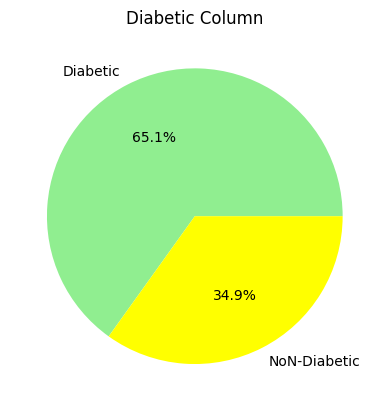

In [12]:
labels =['Diabetic','NoN-Diabetic']
plt.pie(df['Outcome'].value_counts(),labels=labels,colors=['lightgreen','yellow'],autopct='%1.1f%%')
plt.title("Diabetic Column")

## Analysing  the Diabetic persons data 

In [13]:
# pregnancies group together to understand data well .


Text(0.5, 1.0, 'Count of Diabetic Patients by Pregnancies')

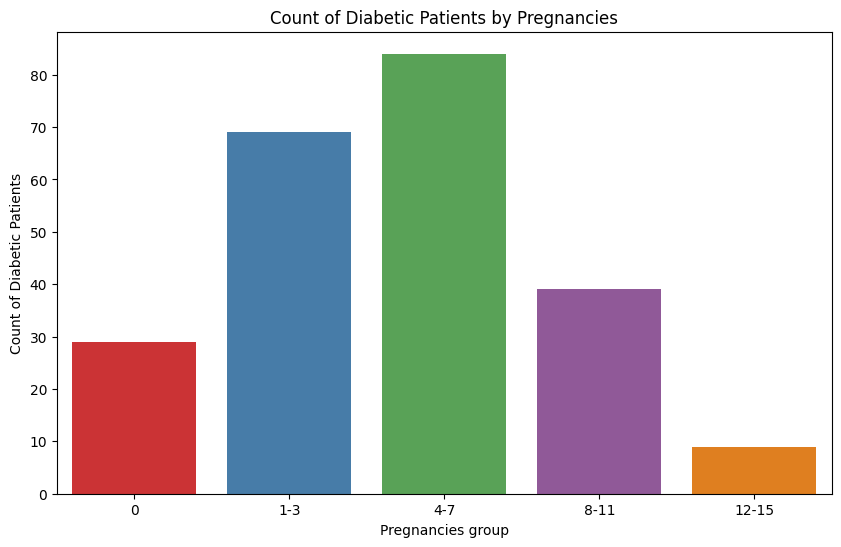

In [14]:
pregnancies_bins = [0, 1, 4, 8, 12, 16]
pregnancies_labels = ['0', '1-3', '4-7', '8-11', '12-15']
df1=df[df['Outcome']==1]
# Create 'PregnanciesGroup' column
df1['PregnanciesGroup']= pd.cut(df1['Pregnancies'], bins=pregnancies_bins, labels=pregnancies_labels)


# Create a bar chart for Diabetic patients with 'PregnanciesGroup' as the x-axis
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df1, x='PregnanciesGroup', order=pregnancies_labels, palette="Set1")
plt.xlabel('Pregnancies group')
plt.ylabel('Count of Diabetic Patients')
plt.title('Count of Diabetic Patients by Pregnancies')

#### Blood pressure is divided as low , medium and high ,also further high blood pressure is divided as stage1 and stage2 hypertension

In [15]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Low'),
  Text(1, 0, 'Medium'),
  Text(2, 0, 'High'),
  Text(3, 0, 'Stage1 Hypertension'),
  Text(4, 0, 'Stage2 Hypertension')])

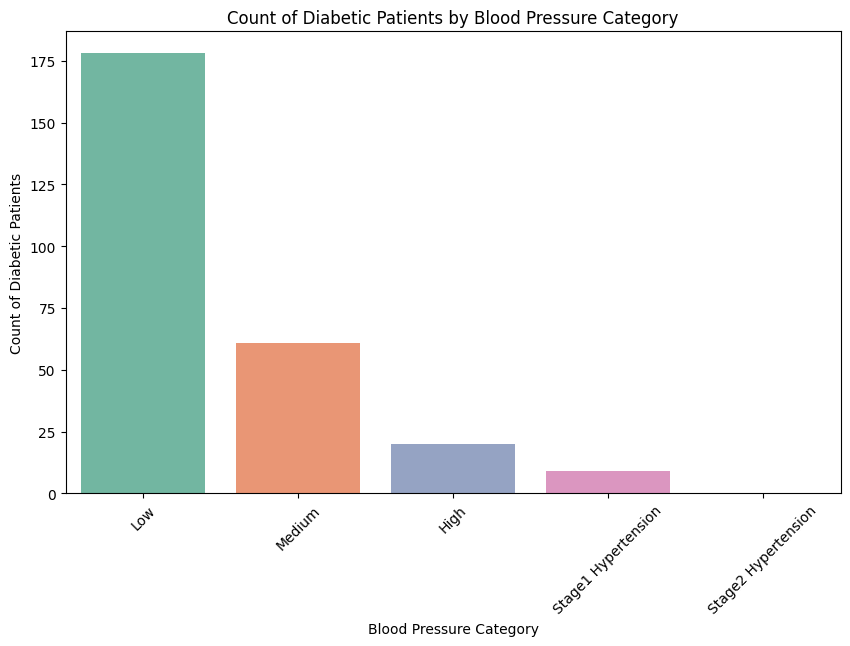

In [16]:
bp_bins = [0, 80, 89, 99, 119, 140]  # Adjust the boundaries as needed

bp_labels=['Low','Medium','High','Stage1 Hypertension','Stage2 Hypertension']
df['bp_group']= pd.cut(df['BloodPressure'], bins=bp_bins, labels=bp_labels,right=False)
df1=df[df['Outcome']==1]
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df1, x='bp_group', order=bp_labels, palette="Set2")
plt.xlabel('Blood Pressure Category')
plt.ylabel('Count of Diabetic Patients')
plt.title('Count of Diabetic Patients by Blood Pressure Category')
plt.xticks(rotation=45)


#### Converting the ages in to the age group to understand which age group has high diabetics patients

Text(0.5, 1.0, 'Count of Diabetic Patients by Age Group')

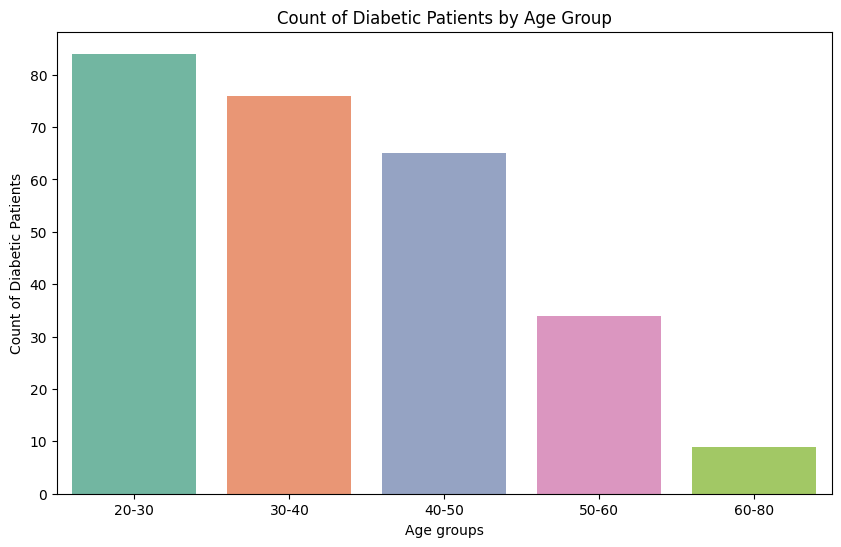

In [17]:
age_bins = [20,30,40,50,60,80]  # Adjust the boundaries as needed
age_labels=['20-30','30-40','40-50','50-60','60-80']
df['age_group']= pd.cut(df['Age'], bins=age_bins, labels=age_labels,right=False)
df1=df[df['Outcome']==1]
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df1, x='age_group', order=age_labels, palette="Set2")
plt.xlabel('Age groups')
plt.ylabel('Count of Diabetic Patients')
plt.title('Count of Diabetic Patients by Age Group')


Text(0.5, 1.0, 'Count of Diabetic Patients by BMI Group')

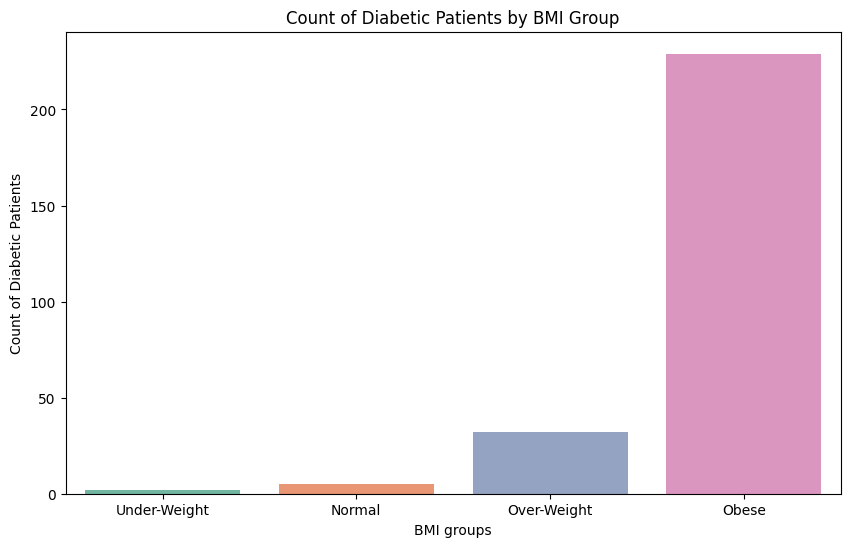

In [18]:
BMI_bins = [0, 18, 24, 29, 1000]
BMI_labels=['Under-Weight','Normal','Over-Weight','Obese']
df['BMI_group']= pd.cut(df['BMI'], bins=BMI_bins, labels=BMI_labels,right=False)
df1=df[df['Outcome']==1]
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df1, x='BMI_group', order=BMI_labels, palette="Set2")
plt.xlabel('BMI groups')
plt.ylabel('Count of Diabetic Patients')
plt.title('Count of Diabetic Patients by BMI Group')


#### By the above Graph we can understand the Diabetic patients are overweight ,so Weight can be one factor that effects Diabetes

Text(0.5, 1.0, 'Count of Diabetic Patients by insulin level Group')

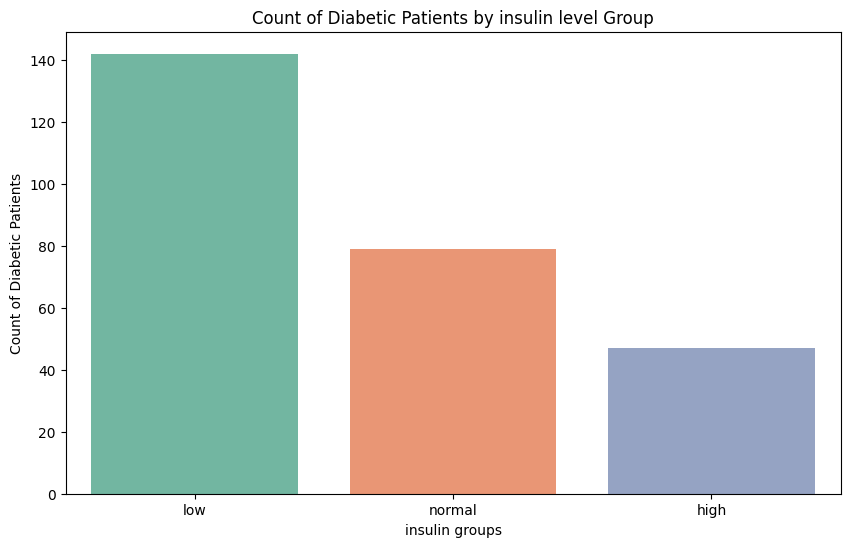

In [19]:
insulin_bins = [0, 50, 200,500]
insulin_labels=['low','normal','high']
df['insulin_group']= pd.cut(df['Insulin'], bins=insulin_bins, labels=insulin_labels,right=False)
df1=df[df['Outcome']==1]
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df1, x='insulin_group', order=insulin_labels, palette="Set2")
plt.xlabel('insulin groups')
plt.ylabel('Count of Diabetic Patients')
plt.title('Count of Diabetic Patients by insulin level Group')


#### Above graph we can analyse  low Insulin levels in more  Diabetic patients has  that cause the increase in blood sugar level 

Text(0.5, 1.0, 'Count of Diabetic Patients by glucose level Group')

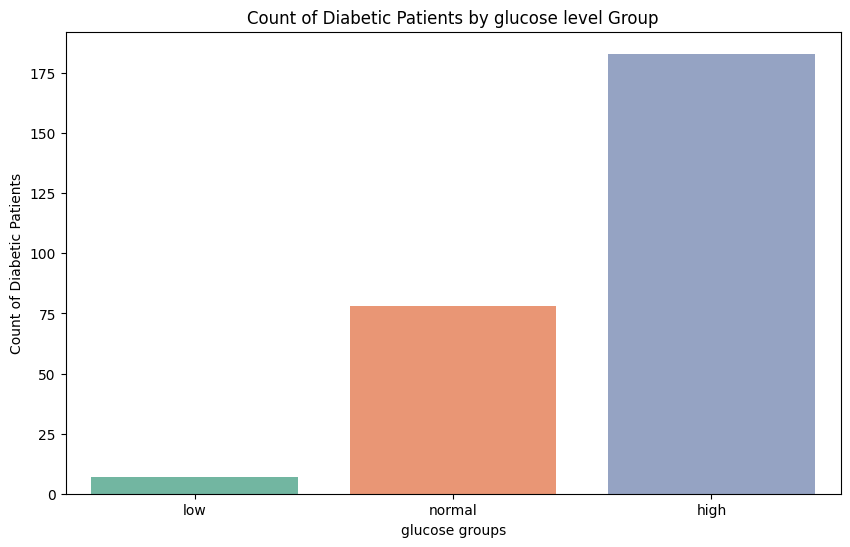

In [20]:
glucose_bins = [0, 90, 125,1000]
glucose_labels=['low','normal','high']
df['glucose_group']= pd.cut(df['Glucose'], bins=glucose_bins, labels=glucose_labels,right=False)
df1=df[df['Outcome']==1]
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df1, x='glucose_group', order=glucose_labels, palette="Set2")
plt.xlabel('glucose groups')
plt.ylabel('Count of Diabetic Patients')
plt.title('Count of Diabetic Patients by glucose level Group')


In [21]:
# By the above graph we can understand that high glucose levels are present in diabetics patients  

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Very thin'),
  Text(1, 0, 'Thin'),
  Text(2, 0, 'Normal'),
  Text(3, 0, 'Thick'),
  Text(4, 0, 'Very thick')])

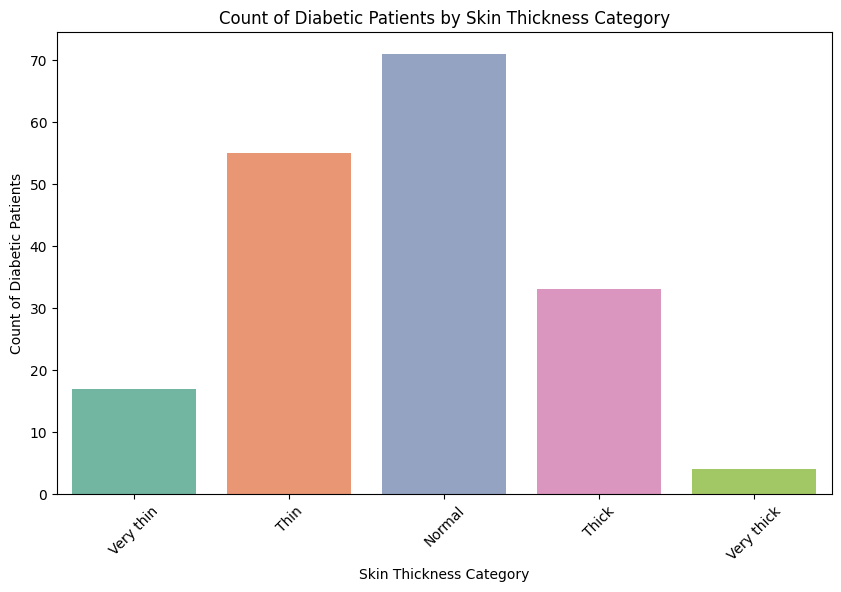

In [22]:
skin_thickness_bins = [0, 20, 30, 40, 50, 100]
skin_thickness_labels = ['Very thin', 'Thin', 'Normal', 'Thick', 'Very thick']

# Create a new column 'SkinThicknessCategory' based on the bins and labels
df['SkinThicknessCategory'] = pd.cut(df['SkinThickness'], bins=skin_thickness_bins, labels=skin_thickness_labels)

# Filter the dataset to include only records with 'Outcome' equal to 1 (Diabetic patients)
df1 = df[df['Outcome'] == 1]

# Create a bar chart for Diabetic patients with 'SkinThicknessCategory' as the x-axis
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df1, x='SkinThicknessCategory', order=skin_thickness_labels, palette="Set2")
plt.xlabel('Skin Thickness Category')
plt.ylabel('Count of Diabetic Patients')
plt.title('Count of Diabetic Patients by Skin Thickness Category')
plt.xticks(rotation=45)

In [23]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'bp_group',
       'age_group', 'BMI_group', 'insulin_group', 'glucose_group',
       'SkinThicknessCategory'],
      dtype='object')

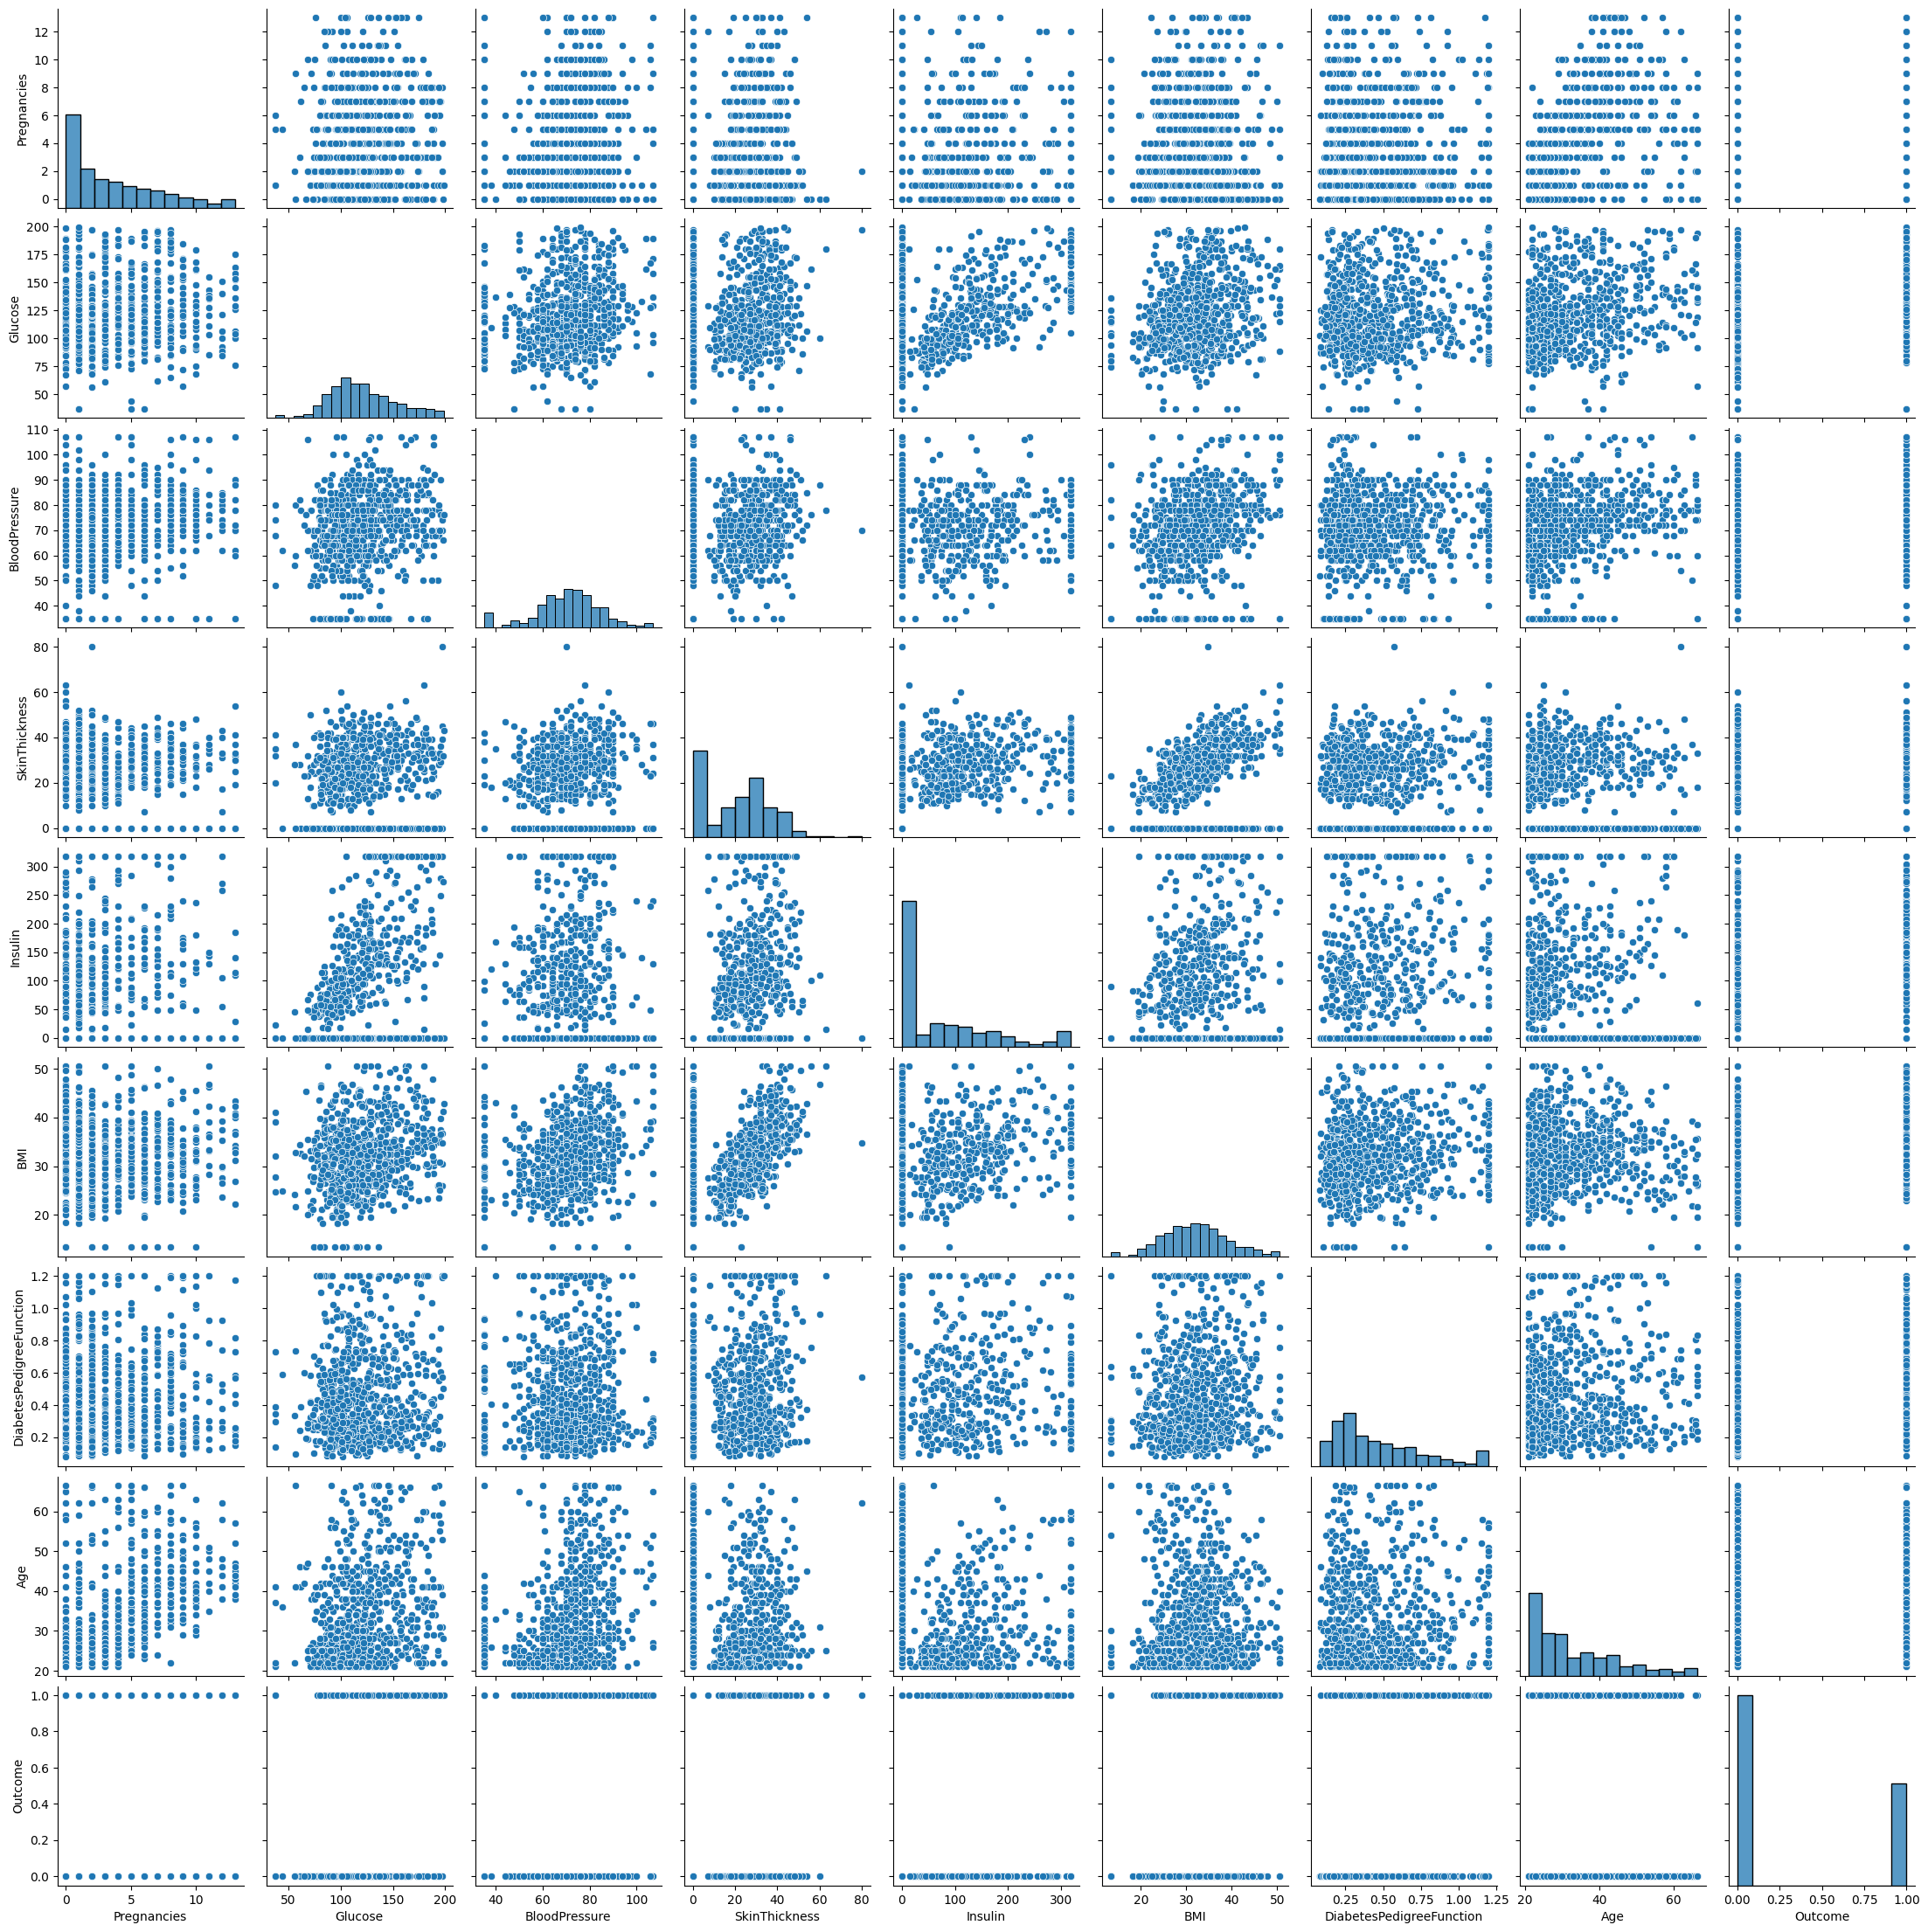

In [44]:
sns.pairplot(data=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']])

In [25]:
correlation =df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].corr()


<Axes: >

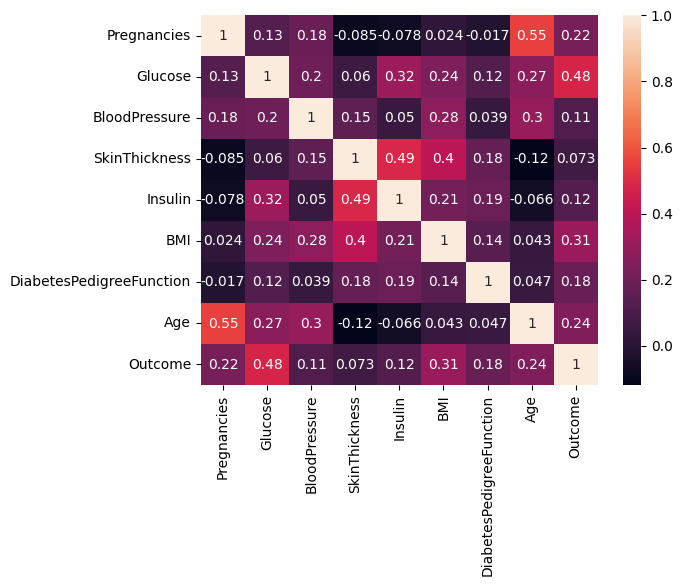

In [26]:
sns.heatmap(correlation,annot=True)

### Observations :

In the dataset , By means of the count plot we got the some analysis
> 1. The person who has  diabetes are moslty  over-weight or obease. 
> 2. The Diabetic person has low Insulin level.
> 3. The Diabetic person has high Glucose level
> 5. Age does not play as factor in Diabetic area


### Test Train Split

In [27]:
#Independent Variables
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
#Target variable
y = df['Outcome']

In [28]:
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction   Age  
0                     0.627  50.0  
1                     0.351  31.0  
2                     0.672  32.0  
3                     0.167  21.0  
4                     1.200  33.0

In [29]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Feature scaling 

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [32]:
X_train

array([[-0.52919719, -1.19746924, -2.5781586 , ..., -2.67546992,
        -0.53171951, -1.04683802],
       [ 1.61250668, -0.29508951,  0.80814612, ..., -0.55302255,
         2.6446253 ,  1.51360123],
       [-0.83515488,  0.57506238, -1.7856192 , ..., -0.48155968,
         0.70904018, -0.95854701],
       ...,
       [ 1.91846437, -0.64959583,  1.09634226, ...,  1.93388547,
         2.41774353,  0.45410913],
       [-1.14111257,  0.63951807, -2.5781586 , ...,  1.47652308,
        -0.88267725, -0.34050995],
       [-1.14111257,  0.12387251,  1.81683263, ..., -1.36769932,
        -0.68061068, -1.04683802]])

In [33]:
y_train

60     0
618    1
346    0
294    0
231    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 614, dtype: int64

## Applying Machine Learning Models

### Logistic Regression 

In [34]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred_test = logistic.predict(X_test)
y_pred_train = logistic.predict(X_train)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [35]:
print("Train accuracy score",round(accuracy_score(y_train, y_pred_train)*100, 2))
print("Test accuracy score",round(accuracy_score(y_test, y_pred_test)*100, 2))
print('cross validation score',cross_val_score(logistic,X,y,scoring='accuracy').mean()*100)

Train accuracy score 78.01
Test accuracy score 75.32
cross validation score 76.43748408454292


In [36]:
lr=round(accuracy_score(y_test, y_pred_test)*100, 2)

### K-Nearest Neighbors

In [37]:
knn_classifier = KNeighborsClassifier(n_neighbors=4)
knn_classifier.fit(X_train, y_train)
y_pred_knn_test= knn_classifier.predict(X_test)
y_pred_knn_train= knn_classifier.predict(X_train)
class_report_knn = classification_report(y_pred_knn_test, y_test)
print(class_report_knn)


              precision    recall  f1-score   support

           0       0.88      0.72      0.79       120
           1       0.40      0.65      0.49        34

    accuracy                           0.71       154
   macro avg       0.64      0.69      0.64       154
weighted avg       0.77      0.71      0.73       154



In [38]:
print("Train accuracy score",round(accuracy_score(y_train, y_pred_knn_train)*100, 2))
print("Test accuracy score",round(accuracy_score(y_test, y_pred_knn_test)*100, 2))
print('cross validation score',cross_val_score(knn_classifier,X,y,scoring='accuracy').mean()*100)

Train accuracy score 82.74
Test accuracy score 70.78
cross validation score 73.43604108309991


In [39]:
knn=round(accuracy_score(y_test, y_pred_knn_test)*100, 2)

### Decision Tree

In [40]:
decision = DecisionTreeClassifier(random_state=42)
decision.fit(X_train, y_train)
y_pred_dt_test = decision.predict(X_test)
y_pred_dt_train = decision.predict(X_train)
class_report_dt = classification_report(y_pred_dt_test, y_test)
print(class_report_dt)

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        94
           1       0.67      0.62      0.64        60

    accuracy                           0.73       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.73      0.73      0.73       154



In [41]:
print("Train accuracy score",round(accuracy_score(y_train, y_pred_dt_train)*100, 2))
print("Test accuracy score",round(accuracy_score(y_test, y_pred_dt_test)*100, 2))
print('cross validation score',cross_val_score(decision,X,y,scoring='accuracy').mean()*100)

Train accuracy score 100.0
Test accuracy score 73.38
cross validation score 71.36830489771665


In [42]:
dt=round(accuracy_score(y_test, y_pred_dt_test)*100, 2)

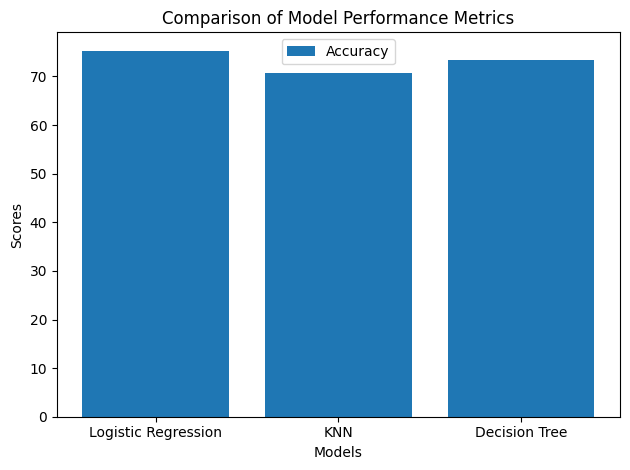

In [43]:
models=['Logistic Regression','KNN','Decision Tree']
accuracy=[lr,knn,dt]
plt.bar(models,accuracy, label='Accuracy')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Model Performance Metrics')
plt.legend()
plt.tight_layout()
plt.show()


## Conclusion:


After the Building diffrent models for the dataset like logistic regression, Knn ,Decision tree almost accuracy for 3 models are same , but for predicting the Diabetes for the patients , i chose the Logistic regression is good for among all other models .

As the conclusion The logistic regression is best model for predicting the diabetes in patients based on given data